Import all of the bridges and create the corresponding file list

In [1]:
from IEimport.IEimport import import_IE_from_excel
from IEimport.IEimport import generate_graph_from_json

excel_directory = "/Users/Julian/Documents/WorkDocuments/Irreducible Element/IE models/Excel/04-12-20/"
json_directory = "/Users/Julian/Documents/WorkDocuments/Irreducible Element/IE models/first-bridge-journal-json/"

bridge_list = ['Castledawson_Deck_Bridge','Drumderg_Footbridge','Baker_Bridge','Toome_Arch_Bridge','Humber_Bridge','Randallstown_West_Deck_Bridge','Brough_Road_Footbridge','Bosphorous_Original','Bosphorous_Repaired','Bosphorous_Repaired_Individual_Hangers']
file_list = []

for bridge in bridge_list:
    import_IE_from_excel(bridge, f"{excel_directory}{bridge}_IEM.xlsx", json_directory)
    generate_graph_from_json(f"{json_directory}{bridge}.json")
    file_list.append(f"{json_directory}{bridge}.json")

/Users/Julian/Documents/WorkDocuments/Irreducible Element/IE models/first-bridge-journal-json/Castledawson_Deck_Bridge.json
/Users/Julian/Documents/WorkDocuments/Irreducible Element/IE models/first-bridge-journal-json/Drumderg_Footbridge.json
/Users/Julian/Documents/WorkDocuments/Irreducible Element/IE models/first-bridge-journal-json/Baker_Bridge.json
/Users/Julian/Documents/WorkDocuments/Irreducible Element/IE models/first-bridge-journal-json/Toome_Arch_Bridge.json
/Users/Julian/Documents/WorkDocuments/Irreducible Element/IE models/first-bridge-journal-json/Humber_Bridge.json
/Users/Julian/Documents/WorkDocuments/Irreducible Element/IE models/first-bridge-journal-json/Randallstown_West_Deck_Bridge.json
/Users/Julian/Documents/WorkDocuments/Irreducible Element/IE models/first-bridge-journal-json/Brough_Road_Footbridge.json
/Users/Julian/Documents/WorkDocuments/Irreducible Element/IE models/first-bridge-journal-json/Bosphorous_Original.json
/Users/Julian/Documents/WorkDocuments/Irreduc

Calculate the full distance matrix

In [2]:
from comparison.backtracking import create_distance_matrix

similarity_matrix, nodes_in_mcs = create_distance_matrix(file_list, bridge_list)
print(nodes_in_mcs)
print(similarity_matrix)

Matching 1/10 and 1/10
Matching 1/10 and 2/10
Matching 1/10 and 3/10
Matching 1/10 and 4/10
Matching 1/10 and 5/10
Matching 1/10 and 6/10
Matching 1/10 and 7/10
Matching 1/10 and 8/10
Matching 1/10 and 9/10
Matching 1/10 and 10/10
Matching 2/10 and 2/10
Matching 2/10 and 3/10
Matching 2/10 and 4/10
Matching 2/10 and 5/10
Matching 2/10 and 6/10
Matching 2/10 and 7/10
Matching 2/10 and 8/10
Matching 2/10 and 9/10
Matching 2/10 and 10/10
Matching 3/10 and 3/10
Matching 3/10 and 4/10
Matching 3/10 and 5/10
Matching 3/10 and 6/10
Matching 3/10 and 7/10
Matching 3/10 and 8/10
Matching 3/10 and 9/10
Matching 3/10 and 10/10
Matching 4/10 and 4/10
Matching 4/10 and 5/10
Matching 4/10 and 6/10
Matching 4/10 and 7/10
Matching 4/10 and 8/10
Matching 4/10 and 9/10
Matching 4/10 and 10/10
Matching 5/10 and 5/10
Matching 5/10 and 6/10
Matching 5/10 and 7/10
Matching 5/10 and 8/10
Matching 5/10 and 9/10
Matching 5/10 and 10/10
Matching 6/10 and 6/10
Matching 6/10 and 7/10
Matching 6/10 and 8/10
Matchi

Plot heatmap for the reduced set of bridges (Figure 1)

['Beam & Slab', 'Truss', 'Cable-stayed', 'Arch', 'Suspension']
[[1.         0.06569343 0.09615385 0.06956522 0.00588235]
 [0.06569343 1.         0.05681818 0.05405405 0.00515464]
 [0.09615385 0.05681818 1.         0.18978102 0.01282051]
 [0.06956522 0.05405405 0.18978102 1.         0.00536673]
 [0.00588235 0.00515464 0.01282051 0.00536673 1.        ]]
              Beam & Slab  Truss  Cable-stayed  Arch  Suspension
Beam & Slab          37.0    9.0          10.0   8.0         3.0
Truss                 9.0  109.0          10.0  10.0         3.0
Cable-stayed         10.0   10.0          77.0  26.0         7.0
Arch                  8.0   10.0          26.0  86.0         3.0
Suspension            3.0    3.0           7.0   3.0       476.0


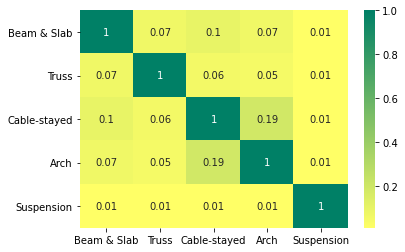

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np

# Bridges Randallstown [-2] and Brough_Road [-1] to be removed
fig1_bridge_list = ['Beam & Slab', 'Truss', 'Cable-stayed', 'Arch', 'Suspension']
# del fig1_bridge_list[-1]
# del fig1_bridge_list[-1]
# del fig1_bridge_list[-1]
# del fig1_bridge_list[-1]
print(fig1_bridge_list)

fig1_similarity_matrix = similarity_matrix.copy()
fig1_similarity_matrix = np.delete(fig1_similarity_matrix,[5, 6, 7, 8, 9],0)
fig1_similarity_matrix = np.delete(fig1_similarity_matrix,[5, 6, 7, 8, 9],1)

print(fig1_similarity_matrix)

df = pd.DataFrame(data=fig1_similarity_matrix, index=fig1_bridge_list, columns=fig1_bridge_list).round(2)
ax = sns.heatmap(df, annot=True, cmap="summer_r")

fig1_nodes_in_mcs = nodes_in_mcs.copy()
fig1_nodes_in_mcs = np.delete(fig1_nodes_in_mcs,[5, 6, 7, 8, 9],0)
fig1_nodes_in_mcs = np.delete(fig1_nodes_in_mcs,[5, 6, 7, 8, 9],1)

df2 = pd.DataFrame(data=fig1_nodes_in_mcs, index=fig1_bridge_list, columns=fig1_bridge_list)
print(df2)
df2.to_csv(r'/Users/Julian/Documents/WorkDocuments/Irreducible Element/Random write/fig1_nodes_in_mcs.csv')

Plot heatmap for full set of bridges

               Beam & Slab 1  Truss 1  Cable-stayed  Arch  Suspension 1  \
Beam & Slab 1           37.0      9.0          10.0   8.0           3.0   
Truss 1                  9.0    109.0          10.0  10.0           3.0   
Cable-stayed            10.0     10.0          77.0  26.0           7.0   
Arch                     8.0     10.0          26.0  86.0           3.0   
Suspension 1             3.0      3.0           7.0   3.0         476.0   
Beam & Slab 2           23.0     10.0          12.0   8.0           3.0   
Truss 2                 10.0    107.0          10.0  10.0           3.0   
Suspension 2             7.0      3.0           3.0   3.0         249.0   

               Beam & Slab 2  Truss 2  Suspension 2  
Beam & Slab 1           23.0     10.0           7.0  
Truss 1                 10.0    107.0           3.0  
Cable-stayed            12.0     10.0           3.0  
Arch                     8.0     10.0           3.0  
Suspension 1             3.0      3.0         249.0  


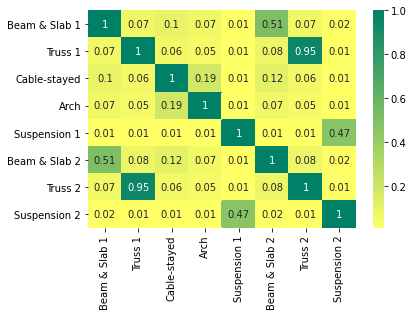

In [4]:
name_list = ['Beam & Slab 1', 'Truss 1', 'Cable-stayed', 'Arch', 'Suspension 1', 'Beam & Slab 2', 'Truss 2', 'Suspension 2']

fig2_nodes_in_mcs = nodes_in_mcs.copy()
fig2_nodes_in_mcs = np.delete(fig2_nodes_in_mcs,[8, 9],0)
fig2_nodes_in_mcs = np.delete(fig2_nodes_in_mcs,[8, 9],1)

nodes_df = pd.DataFrame(data=fig2_nodes_in_mcs, index=name_list, columns=name_list)
print(nodes_df)

fig2_similarity_matrix = similarity_matrix.copy()
fig2_similarity_matrix = np.delete(fig2_similarity_matrix,[8, 9],0)
fig2_similarity_matrix = np.delete(fig2_similarity_matrix,[8, 9],1)

print(fig2_similarity_matrix)

df = pd.DataFrame(data=fig2_similarity_matrix, index=name_list, columns=name_list).round(2)
ax = sns.heatmap(df, annot=True, cmap="summer_r")

abbr_name_list = ['B&S1', 'T1', 'CS1', 'A1', 'S1', 'B&S2', 'T2', 'S2']
df2 = pd.DataFrame(data=fig2_similarity_matrix, index=abbr_name_list, columns=abbr_name_list).round(2)
df2.to_csv(r'/Users/Julian/Documents/WorkDocuments/Irreducible Element/Random write/fig2_similarity_matrix.csv')

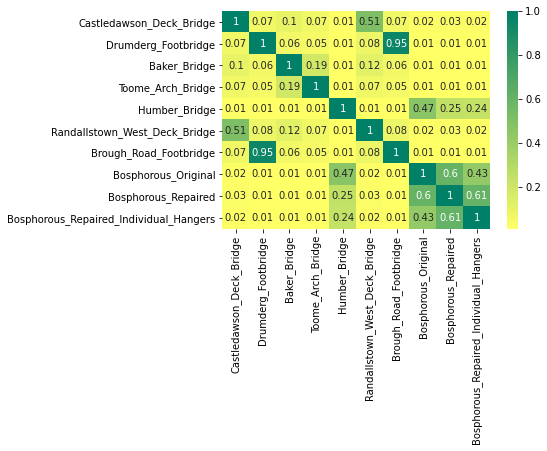

In [5]:
df = pd.DataFrame(data=similarity_matrix, index=bridge_list, columns=bridge_list).round(2)
ax = sns.heatmap(df, annot=True, cmap="summer_r")